# Problem 5.3: Inducible regulation of gene expression 

## Anvita Mishra, Snigdha Kumar, Rachel Ng, Preethi Periyakoil



In [1]:
import collections

import numpy as np
import numba
import pandas as pd
import scipy.stats as st

import emcee
import corner
import bebi103
import glob

import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14}
sns.set(rc=rc)
%matplotlib inline

**(a) (20 pts extra credit) Devise and implement an automated gating procedure. Apply it to the data set. If you succeed in this task, use your own gated data in the subsequent analyses. Otherwise, you can use the gating results I have included in the data set.**

# COME BACK TO THIS

**(b) For each CSV file in the data set, compute the mean YFP fluorescence for the gated samples. It will probably help you to store these values in a DataFrame that has the date, run number, IPTG concentration, strain, and YFP fluorescence as columns. Hint: For parsing multiple files, the glob.glob() function of the glob module might be useful. You will also need to parse the file names of the CSV files. I found Python's split method for strings to be useful.**

In [2]:
fnames = glob.glob('../data/flow_data/*.csv')
# initializing the data frame
variable_names = ['date', 'run_number', 'strain', 'concentration', 'mean_YFP_intensity']
dfs = []

for i, f in enumerate(fnames):
    # Extracting date, run number, strain, and concentration
    g = f.lstrip('../data/flow_data//')
    h = g.rstrip('.csv')
    values = h.split('_')
    
    # Finding the mean intensity for the dataframe
    x = pd.read_csv(f, comment='#')
    inds = x['gate']==1
    gated_1 = x.loc[inds]
    mean_intensity = gated_1['FITC-A'].mean()
    values.append(mean_intensity)
    df_new = pd.DataFrame(values).T
    
    #Append into overall dataframe
    dfs.append(df_new)
    
final_df = pd.concat(dfs)
final_df.columns = variable_names
    


In [3]:
final_df.head()

,date,run_number,strain,concentration,mean_YFP_intensity
0,20160804,0,auto,0.0,4776.12
0,20160804,0,auto,0.1,4797.3
0,20160804,0,auto,1.0,4797.3
0,20160804,0,auto,10.0,4380.77
0,20160804,0,auto,100.0,4243.6


We need to search for 

**(c) Compute the fold change for each date/run/IPTG concentration combination. In other words, this is the fold change for each trial at each IPTG concentration.**


In [4]:
# Initialize DataFrame
variable_names = ['date', 'run_number', 'concentration', 'F']
dfs = []

for day in final_df.date.unique():
    for number in final_df[final_df.date == day].run_number.unique():
        inds_2 = (final_df['date'] == day) & (final_df['run_number'] == number)
        desired_df = final_df.loc[inds_2]   
        for conc in desired_df.concentration.unique():
            # Calculate F
            auto = desired_df.loc[(desired_df.strain == 'auto')&(desired_df.concentration == conc)]['mean_YFP_intensity'].values
            RBS = desired_df.loc[(desired_df.strain == 'RBS1027')&(desired_df.concentration == conc)]['mean_YFP_intensity'].values
            delta = desired_df.loc[(desired_df.strain == 'delta')&(desired_df.concentration == conc)]['mean_YFP_intensity'].values
            F = (RBS-auto)/(delta-auto)
            values = [day, number, float(conc), F[0]]
            df_new = pd.DataFrame(values).T
            #Append into overall dataframe
            dfs.append(df_new)

df = pd.concat(dfs)
df.columns = variable_names
            
            

In [5]:
df

,date,run_number,concentration,F
0,20160804,0,0,-0.0122188
0,20160804,0,0.1,-0.0224913
0,20160804,0,1,-0.0224913
0,20160804,0,10,0.0863776
0,20160804,0,100,0.722254
0,20160804,0,1000,0.87255
0,20160804,0,25,0.290084
0,20160804,0,250,0.188985
0,20160804,0,5,0.037732
0,20160804,0,50,0.487291


**(d) Perform a regression on the fold change vs. IPTG concentration data to get estimates for $R$, $K_{RD}$, $K_{AI}$. You may assume the other parameters are fixed at the values listed in the above table. Be sure to report your results graphically and with numerical summaries.**

We can start by taking a look at the plot of concentrations vs fold change.

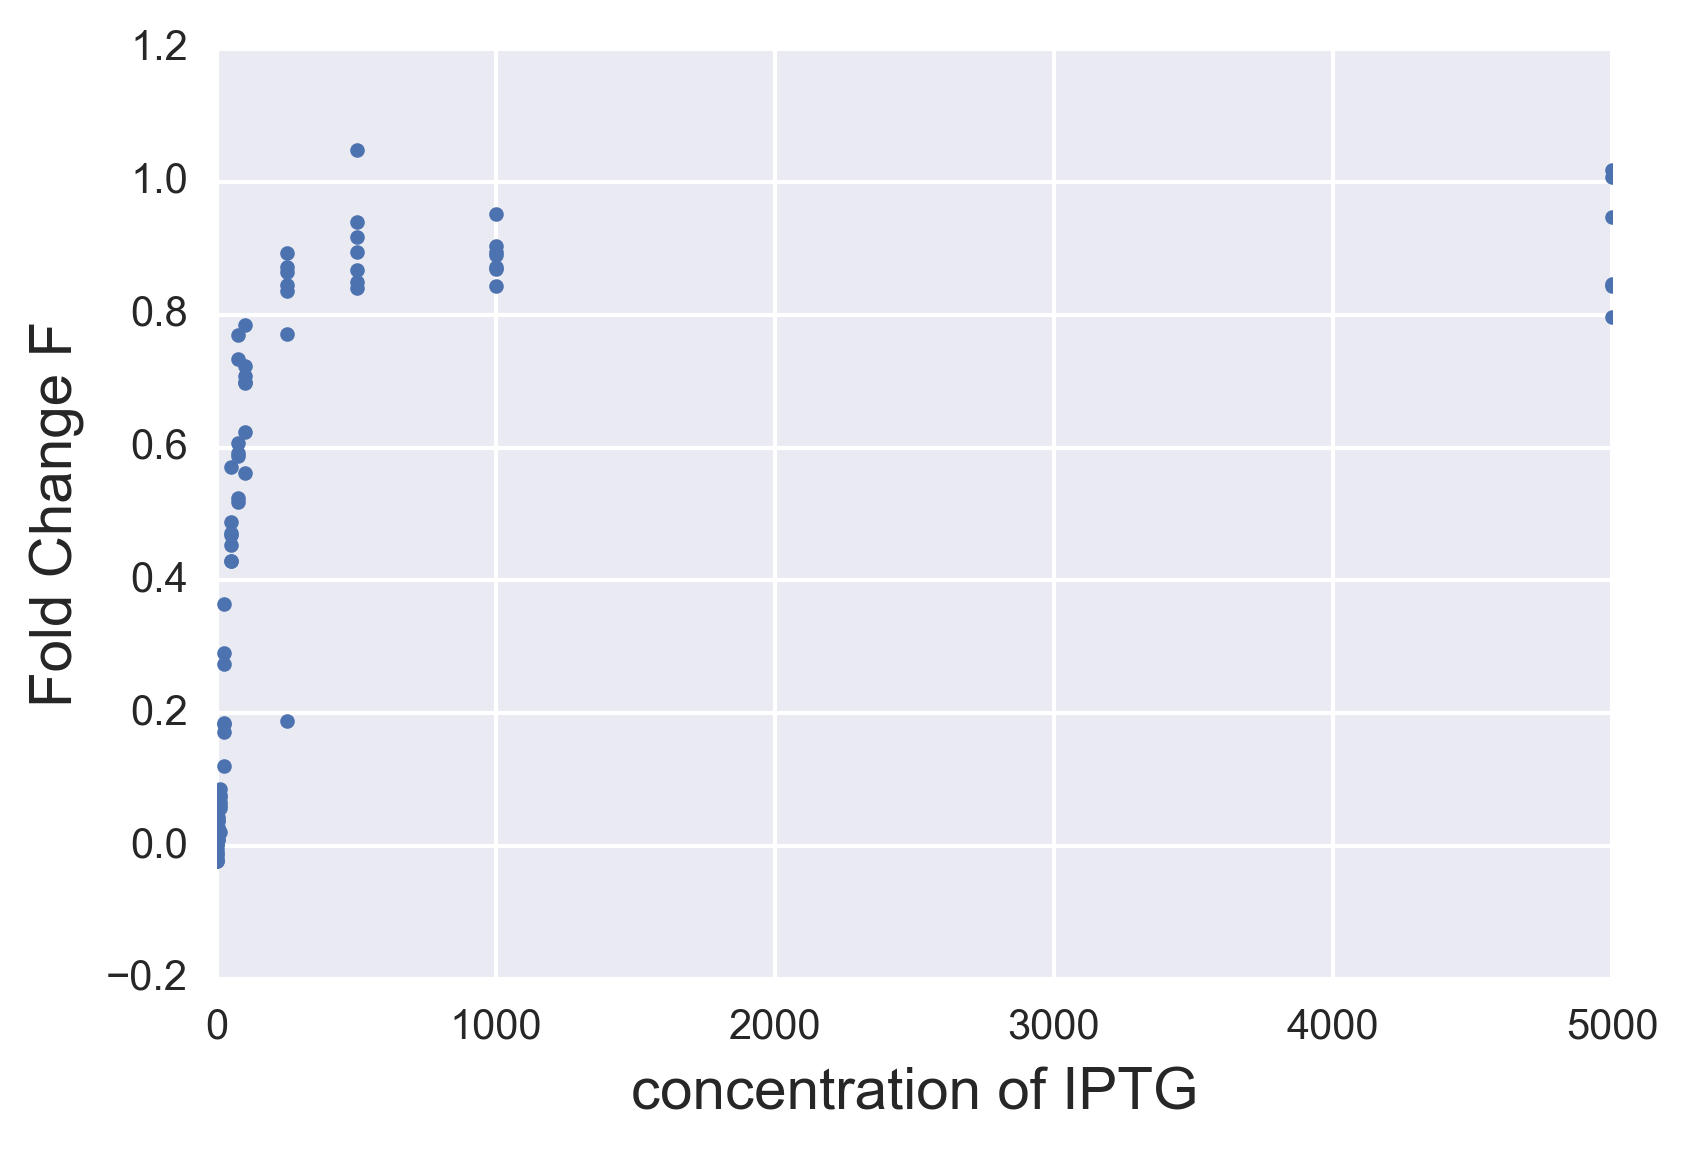

In [6]:
plt.plot(df['concentration'].values, df['F'].values, '.')
plt.xlabel('concentration of IPTG')
plt.ylabel('Fold Change F')

We want to perform a regression for the values of the parameters $K_A$ and $K_I$ in the following expression:

\begin{align}
F = \left(1 + \frac{\left(1 + \frac{c}{K_\mathrm{A}}\right)^2}{\left(1 + \frac{c}{K_\mathrm{A}}\right)^2 + K_\mathrm{AI}\left(1 + \frac{c}{K_\mathrm{I}}\right)^2}\,\frac{2R}{K_\mathrm{RD}}\right)^{-1}
\end{align}


|Variable/Parameter|Description | Known value|
|:---:|:---:|:---:|
|$c$ | IPTG concentration | controlled experimentally|
|$R$ | repressor copy number | 130 |
|$K_\mathrm{AI}$| equilibrium constant for repressor switching between active and inactive states | 0.01 |
|$K_\mathrm{RD}$ | dissociation constant for binding of active repressor to the promoter| $4.2$|
|$K_\mathrm{A}$| dissociation constant between active repressor and IPTG | unknown|
|$K_\mathrm{I}$| dissociation constant between inactive repressor and IPTG | unknown|

## Using a Gaussian Likelihood

Except for the random point which is 
### to be continued

## Using the Cauchy Likelihood

Based on the plot of concentration vs fold chain, it appearsthat there might be outliers. Thus, we decided to use the Cauchy distribution to fit out data. Again, we need to fit the parameters $K_A, K_I,$ and $\beta$

We know nothing about $K_A$ and $K_I$, so we will assume maximal ignorance and use uniform priors to define our prior distributions. We do not know anything about $K_A$ and $K_I$ other than they must be greater than 0, so we can set some arbitrary large value as our upper limit. (Junedh said 10^5, so let's go)

Uniform prior for $K_A$
$$P(K_A\mid I) =     
\begin{cases}
      (K_{A, max} - K_{A,min})^{-1} = 10^{-5}, & \text{if}\ 0<K_A<1 \\
      0, & \text{otherwise}
 \end{cases}$$
 
$$P(K_I\mid I) =     
\begin{cases}
      (K_{I, max} - K_{I,min})^{-1} = 10^{-5}, & \text{if}\ 0<K_I<1 \\
      0, & \text{otherwise}
 \end{cases}$$
We will assume a Jeffreys prior for $\beta$.

# I don't know how legit this explanation is

\begin{align}
P(K_A, K_I, \beta ~|~D,I) \propto \frac{1}{\beta}\prod_{i\in D} \left[\pi\beta\left(1 + \left(\frac{F_i - F(c, K_A, K_I, R, K_{AI}, K_{RD})}{\beta}\right)^2\right)\right]^{-1},
\end{align}

so

\begin{align}
\ln P(K_A, K_I, \beta ~|~D,I) = \text{constant} - (n+1) \ln \beta
- \sum_{i\in D} \ln\left(1 + \left(\frac{F_i - F(c, K_A, K_I, R, K_{AI}, K_{RD})}{\beta}\right)^2\right)
\end{align}


In [7]:
def fold_change(c, K_A, K_I, R, K_AI, K_RD):
    """
    Theoretical model for the fold change
    """
    num = (1.0 + c/K_A)**2
    denom = num + K_AI*(1 + c/K_I)**2
    
    F = (1.0 + (num/denom)*(2*R/K_RD))**-1
    
    return F

In [8]:
def log_likelihood_cauchy(p, x):
    """
    Cauchy log likelihood.
    """
    K_A, K_I, b = p
    c, F, R, K_AI, K_RD = x
    theoretical_F = fold_change(c, K_A, K_I, R, K_AI, K_RD)
    l = 1.0 + ((F - theoretical_F) / b)**2
    return -len(F) * np.log(b) - np.sum(np.log(l))

def log_prior_cauchy(p, ka_max, ka_min, ki_max, ki_min):
    """
    Log prior
    Uniform prior for K_A and K_I
    Jeffrey's prior for beta
    
    """
   
    K_A, K_I, b= p

    if not ka_max > K_A > ka_min:
        return -np.inf
    if not ki_max > K_I > ki_min:
        return -np.inf
    if b <= 0:
        return -np.inf

    return -np.log(b) - np.log((ka_max-ka_min)) - np.log((ki_max-ki_min))
    

def log_posterior_cauchy(p, x, ka_max, ka_min, ki_max, ki_min):
    """
    Log posterior.  
    
    x = activity levels, but can be anything we measure repeatedly.
    """
    c, F, R, K_AI, K_RD = x
    lp = log_prior_cauchy(p, ka_max, ka_min, ki_max, ki_min)
    
    if lp == -np.inf:
        return -np.inf
    
    return lp + log_likelihood_cauchy(p, x)

In [10]:
np.random.seed(42)

# Set up starting point of walker for each parameter
p_dict = collections.OrderedDict(
        [('K_A', (np.random.uniform, (0.35, 0.45,))),
         ('K_I', (np.random.uniform, (0, 100,))),
         ('beta', (np.random.exponential, (1,)))])

n_dim = 3        # number of parameters in the model (r and p)
n_walkers = 50   # number of MCMC walkers
n_burn = 10    # "burn-in" period to let chains stabilize
n_steps = 10   # number of MCMC steps to take after burn-in
ka_max = 10**5
ka_min = 0.1
ki_max = 10**5
ki_min = 0.1


# Constant Parameters
R = 130
K_AI = 0.01
K_RD = 4.2
x = (df['concentration'].values.astype(float), df['F'].values.astype(float), R, K_AI, K_RD)

# Run MCMC
df_mcmc = bebi103.run_ensemble_emcee(
    log_posterior_cauchy, p_dict=p_dict, args=(x, ka_max, ka_min, ki_max, ki_min), n_walkers=50, 
    n_burn=50, n_steps=50)

RuntimeError: Invalid column names: lnprob  chain  lnlike  beta  beta_ind

In [81]:
np

<module 'numpy' from 'C:\\Users\\Anvita Mishra\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>